# Precificação de Alugéis em Nova York

## Data Understanding

In [77]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "../Data"
POLLUTION_DATASET_FILE_NAME = "teste_indicium_precificacao.csv"

file_path = os.path.join(DATA_DIR, POLLUTION_DATASET_FILE_NAME)

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else: 
     print("Arquivo não encontrado")

In [3]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48894.0,1.901753e+07,1.098288e+07,2595.00000,9.472371e+06,1.967743e+07,2.915225e+07,3.648724e+07
host_id,48894.0,6.762139e+07,7.861118e+07,2438.00000,7.822737e+06,3.079553e+07,1.074344e+08,2.743213e+08
latitude,48894.0,4.072895e+01,5.452939e-02,40.49979,4.069010e+01,4.072308e+01,4.076312e+01,4.091306e+01
longitude,48894.0,-7.395217e+01,4.615712e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48894.0,1.527208e+02,2.401566e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimo_noites,48894.0,7.030085e+00,2.051074e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
numero_de_reviews,48894.0,2.327476e+01,4.455099e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_por_mes,38842.0,1.373251e+00,1.680453e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculado_host_listings_count,48894.0,7.144005e+00,3.295286e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
disponibilidade_365,48894.0,1.127762e+02,1.316187e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [41]:
df.head(1)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [13]:
pd.DataFrame({"Quantidade_Dados_Faltantes" : df.isnull().sum()[df.isnull().sum() > 0],\
              "Porcentagem_Dados_Faltantes" : round((df.isnull().sum()[df.isnull().sum() > 0] / len(df) * 100),2)})

,Quantidade_Dados_Faltantes,Porcentagem_Dados_Faltantes
nome,16,0.03
host_name,21,0.04
ultima_review,10052,20.56
reviews_por_mes,10052,20.56


In [29]:
# o tipo set retorna somente valores únicos
set(df[df["ultima_review"].isnull()].index == df[df["reviews_por_mes"].isnull()].index) 

{np.True_}

In [47]:
df[df.duplicated()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


In [61]:
lista = []
for col in df.columns:
    if len(set(df[col].duplicated())) == 2:
        lista.append(col)
lista

['nome',
 'host_id',
 'host_name',
 'bairro_group',
 'bairro',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimo_noites',
 'numero_de_reviews',
 'ultima_review',
 'reviews_por_mes',
 'calculado_host_listings_count',
 'disponibilidade_365']

In [78]:
valore_continuos = ['price', 'minimo_noites', 'numero_de_reviews', 
                    'reviews_por_mes', 'calculado_host_listings_count','disponibilidade_365']

outliers_df = df[valore_continuos]

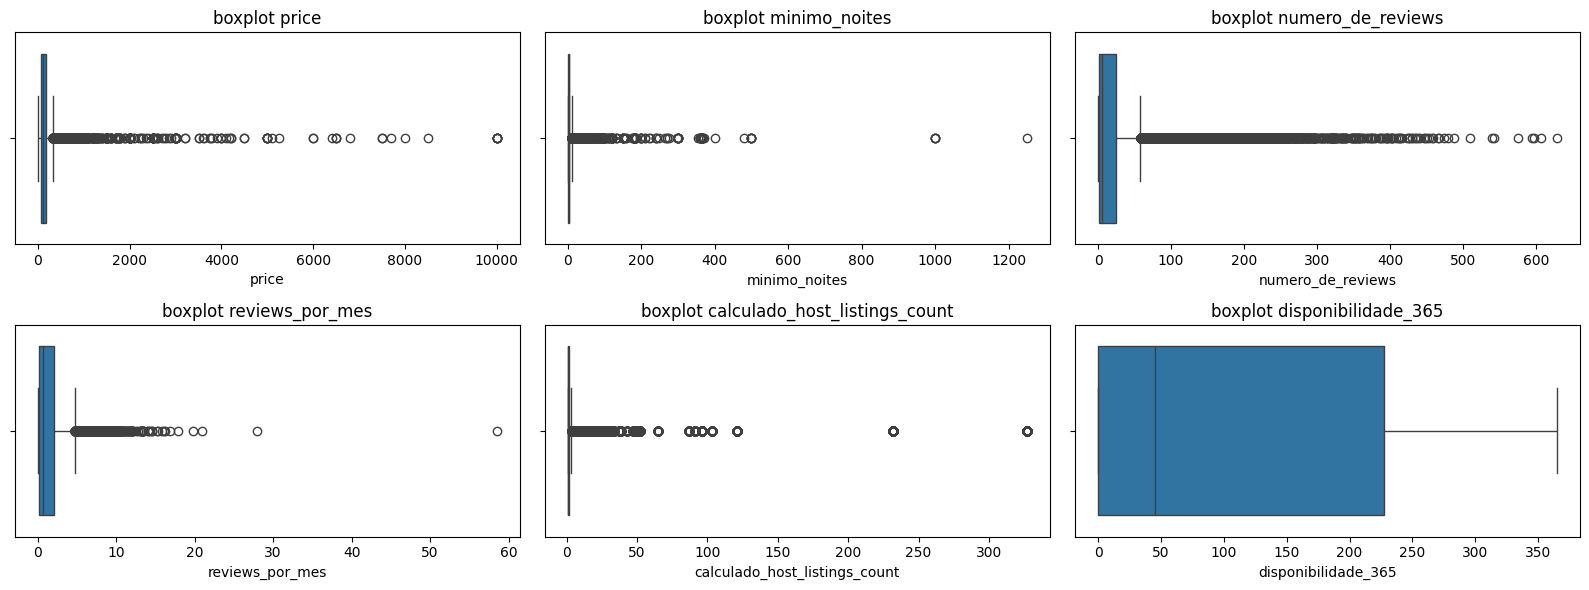

In [104]:
fig, axes = plt.subplots(2,3, figsize=(16,6))
axes = axes.flatten()

for i, col in enumerate(valore_continuos):
  sns.boxplot(data=outliers_df, x= col, ax=axes[i])
  axes[i].set_title(f'boxplot {col}')

plt.tight_layout()
plt.show()


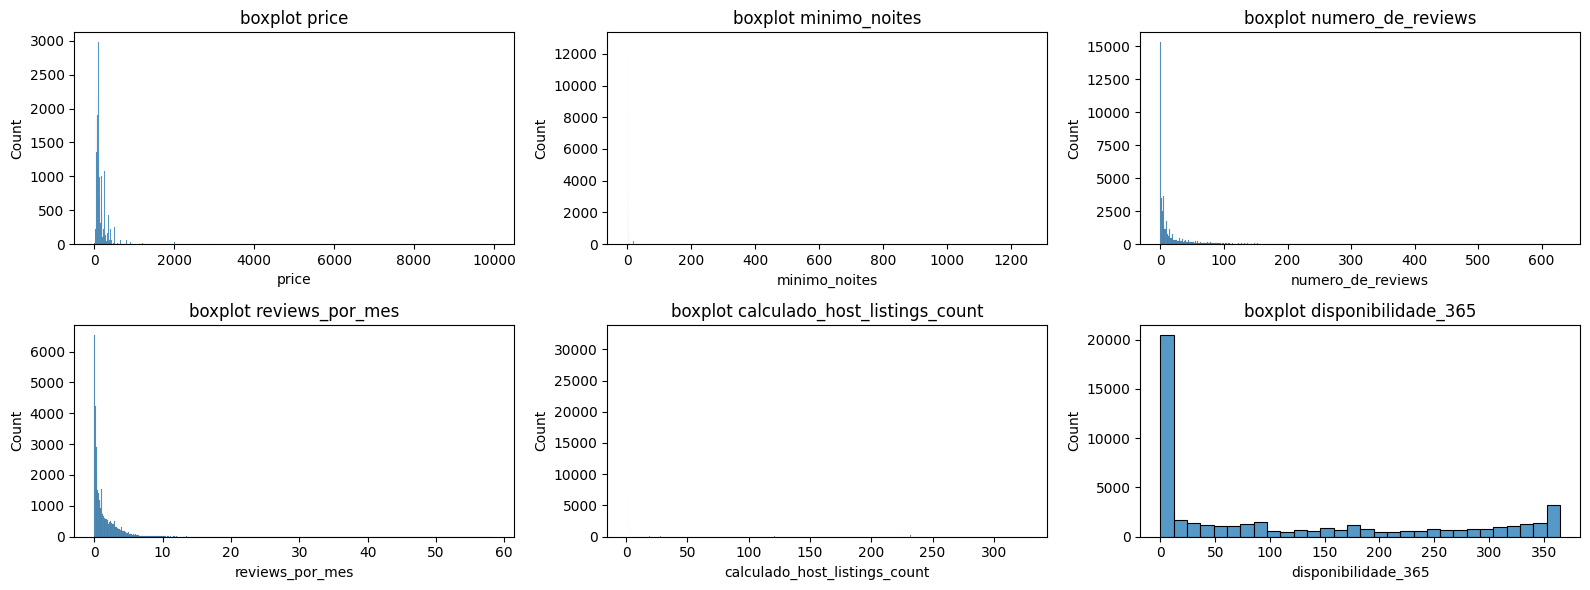

In [105]:
fig, axes = plt.subplots(2,3, figsize=(16,6))
axes = axes.flatten()

for i, col in enumerate(valore_continuos):
  sns.histplot(data=outliers_df, x= col, ax=axes[i])
  axes[i].set_title(f'boxplot {col}')

plt.tight_layout()
plt.show()


## MLFLOW

In [6]:
import mlflow
import mlflow.sklearn

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
mlflow.set_experiment("pollution_dataset_experiment")

<Experiment: artifact_location='file:///home/aurelio/projetos/Python/indicium/Notebooks/mlruns/854777663987049179', creation_time=1734524203582, experiment_id='854777663987049179', last_update_time=1734524203582, lifecycle_stage='active', name='pollution_dataset_experiment', tags={}>

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

/home/aurelio/projetos/Python/indicium/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
with mlflow.start_run():
    # Treinando o modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculando métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Registrando parâmetros, métricas e o modelo
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Registrando o modelo
    mlflow.sklearn.log_model(model, "classification_rf_model",input_example=X_test)

/home/aurelio/projetos/Python/indicium/.venv/lib/python3.10/site-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/home/aurelio/projetos/Python/indicium/.venv/lib/python3.10/site-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing

In [1]:
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# set the experiment id
mlflow.set_experiment(experiment_id="0")

mlflow.autolog()
db = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = rf.predict(X_test)

2024/12/18 09:37:08 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2024/12/18 09:37:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/18 09:37:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7eef292f94514658942bd094855f689f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


In [2]:
mlflow.set_tracking_uri("/home/aurelio/projetos/Python/indicium/Notebooks/mlruns")